# Hello, I'm Nadim.
**An undergrad student at the Department of Oceanography.**

**Shahjalal University of Science and Technology, Sylhet.**

**If you have any query, don't hesitate to contact me.👇🏻**

**Email:** nadimrahman087@gmail.com


<li><a href="https://www.linkedin.com/in/nadim87" target="_blank"><i class="fab fa-linkedin"></i> LinkedIn</a></li>





# -----------------------------------------------------

# Now Lets Start

**Importing necessary Libraries**

In [3]:
import numpy as np
import matplotlib_scalebar.scalebar as mpl_scalebar
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import xarray as xr
import geopandas as gpd
import rioxarray
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Reading Shapefile of ROI and CHIRPS monthly mean dataset from 2000 to 2022.**

In [2]:
bd = gpd.read_file('/run/media/nadim/New Volume/New Folder (1)/Downloads/Bangladesh_shapefile/bgd_admbnda_adm1_bbs_20201113.shp')

# Droping unnecessary columnns.
bd.drop(columns=['Shape_Leng', 'Shape_Area', 'ADM1_PCODE', 'ADM1_REF',
       'ADM1ALT1EN', 'ADM1ALT2EN', 'ADM0_EN', 'ADM0_PCODE', 'date', 'validOn',
       'validTo'],inplace=True)

bd = bd.rename(columns={'ADM1_EN':'Division'})
# bd = bd.explode(index_parts=True)  # Polygonizing to Reduce Polygon ,Multipolygon conflicts
bd.head()

,Division,geometry
0,Barisal,"MULTIPOLYGON (((90.47753 21.76919, 90.47640 21..."
1,Chittagong,"MULTIPOLYGON (((92.32719 20.63543, 92.32749 20..."
2,Dhaka,"MULTIPOLYGON (((90.45673 23.00396, 90.45631 23..."
3,Khulna,"MULTIPOLYGON (((89.24623 21.68914, 89.24840 21..."
4,Mymensingh,"POLYGON ((89.76844 25.43233, 89.76857 25.43221..."


In [3]:
# Opening netCDF file.
data = xr.open_dataset('/run/media/nadim/New Volume/New Folder/New Folder/Downloads/chirps20GlobalMonthlyP05_Lon0360_b0d1_7662_1cc3.nc').load()
data

<xarray.Dataset>
Dimensions:    (time: 277, latitude: 119, longitude: 94)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2023-01-01
  * latitude   (latitude) float32 20.72 20.77 20.82 20.88 ... 26.52 26.57 26.62
  * longitude  (longitude) float32 88.02 88.08 88.12 88.17 ... 92.58 92.62 92.67
Data variables:
    precip     (time, latitude, longitude) float32 nan nan nan ... 6.385 6.029
Attributes: (12/31)
    acknowledgements:          The Climate Hazards Group InfraRed Precipitati...
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             pete@geog.ucsb.edu
    creator_name:              Pete Peterson
    creator_type:              person
    ...                        ...
    summary:                   This dataset has monthly averages of the Clima...
    time_coverage_end:         2023-01-01T00:00:00Z
    time_coverage_start:       2000-01-01T00:00:00Z
    title:                     CHIRPS Version 2.0, Precipitation, Global, 0.0...
    version:                   2.0
    Westernmost_Easting:       88.024994

<Axes: >

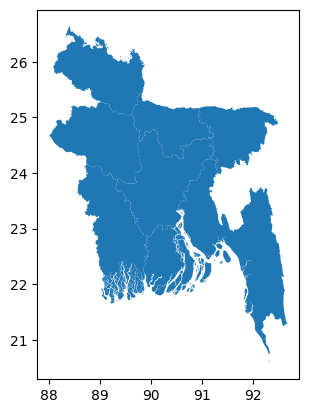

In [4]:
bd.plot()

**Creating Division based outline of ROI to overlay.**

<Axes: >

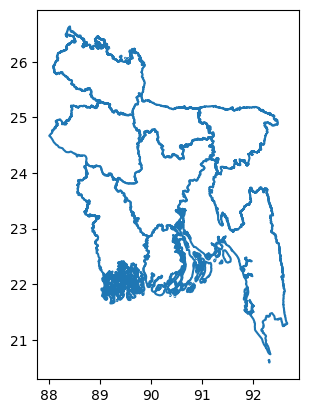

In [5]:

bd_shape = bd.dissolve(by='Division',aggfunc='first').boundary
bd_shape.plot()

**Clipping the netCDF file according to ROI.**

In [6]:

data.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude", inplace=True)
data.rio.write_crs("epsg:4326", inplace=True)
bd_rainfall = data.rio.clip(bd.geometry)
bd_rainfall

<xarray.Dataset>
Dimensions:      (time: 277, latitude: 117, longitude: 93)
Coordinates:
  * time         (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2023-01-01
  * latitude     (latitude) float32 20.77 20.82 20.88 ... 26.47 26.52 26.57
  * longitude    (longitude) float32 88.02 88.08 88.12 ... 92.52 92.58 92.62
    spatial_ref  int64 0
Data variables:
    precip       (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes: (12/31)
    acknowledgements:          The Climate Hazards Group InfraRed Precipitati...
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             pete@geog.ucsb.edu
    creator_name:              Pete Peterson
    creator_type:              person
    ...                        ...
    summary:                   This dataset has monthly averages of the Clima...
    time_coverage_end:         2023-01-01T00:00:00Z
    time_coverage_start:       2000-01-01T00:00:00Z
    title:                     CHIRPS Version 2.0, Precipitation, Global, 0.0...
    version:                   2.0
    Westernmost_Easting:       88.024994

**Selecting Year, latitude, longitude and Rainfall variable to create interpolated map.**

In [7]:
yr_2000 = bd_rainfall.sel(time=data['time'].dt.year == 2000)
precipitation = yr_2000['precip']
lon = yr_2000['longitude']
lat = yr_2000['latitude']


**This is only for "Monthly Mean" Dataset. Different time interval would require different approarch.**

In [8]:
total_precip_2000 = precipitation.sum(dim='time')
total_precip_2000 = total_precip_2000.where(total_precip_2000 != 0, np.nan)

**Ploting the first graph to check if the code is working or not.**

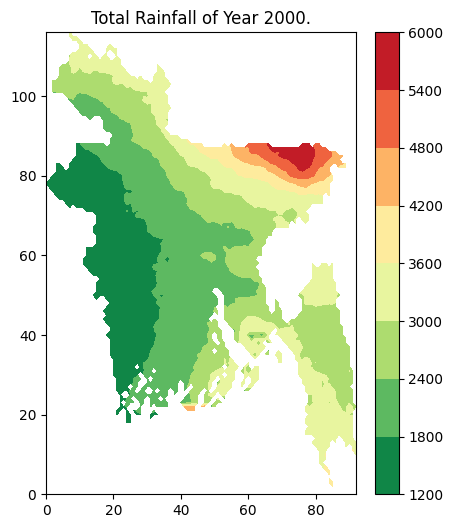

In [9]:
plt.figure(figsize=(5,6))
plt.contourf(total_precip_2000,cmap='RdYlGn_r')
plt.colorbar()
plt.title('Total Rainfall of Year 2000.')
plt.show()

**Congratulations It Worked.🎉🎊 You're doing great.**

**Now let's customize it further.👇🏻**

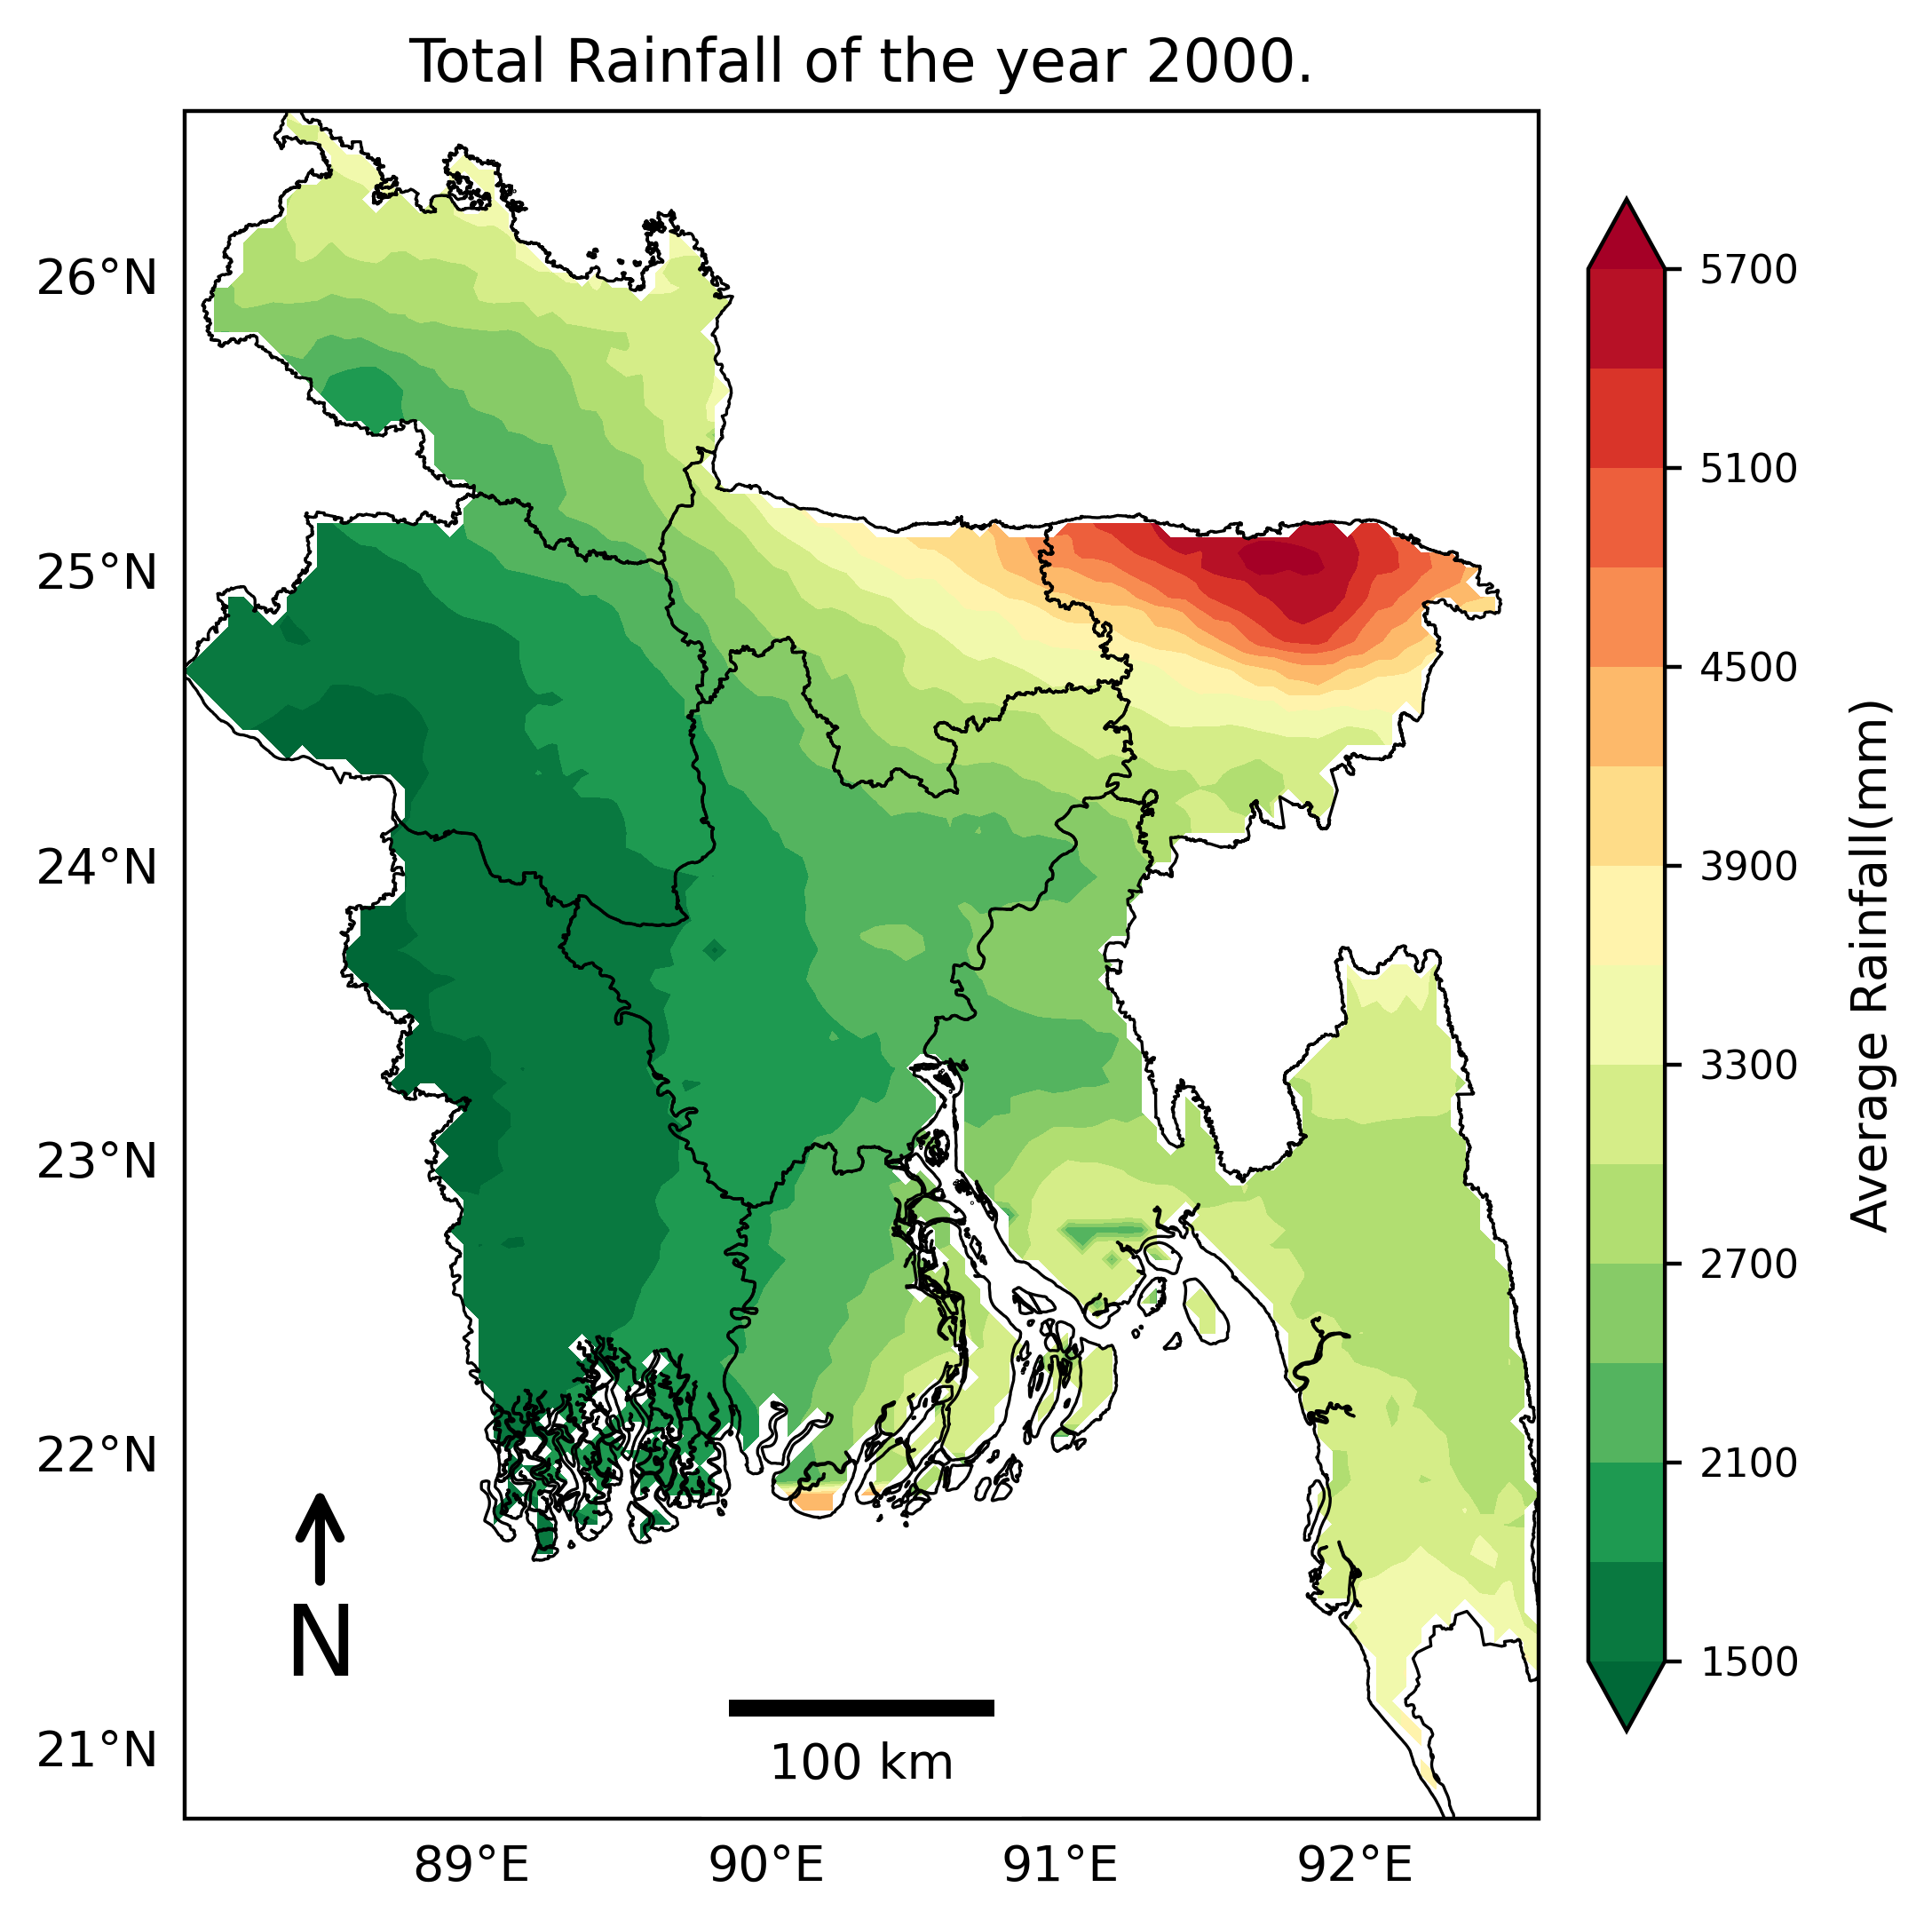

In [10]:
# Creating desired figure dimemnsion and image quality.
fig = plt.figure(figsize=(6,7),dpi=400)


# Creating geoaxis.
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())


# Adding gridlines with specified properties
gl = ax.gridlines(draw_labels=True, color='gray',
                   linestyle='--', alpha=0.5, x_inline=False, y_inline=False)
gl.top_labels = gl.right_labels = False # Removing top and right labels
gl.xlines = gl.ylines = False           # Removing gridlines


# Creating Shaded Map.
cs = ax.contourf(lon, lat, total_precip_2000,levels =15,
                  extend='both', transform=ccrs.PlateCarree(), cmap='RdYlGn_r')


# Adding overlay boundaries.
ax.add_geometries(bd_shape.geometry, ccrs.PlateCarree(),
                   linewidth=0.6, edgecolor='black', facecolor='none')


#Adding colorbar and customizing labels.
cbar = plt.colorbar(cs, ax=ax, orientation='vertical', pad=0.03, shrink=0.8)
cbar.ax.tick_params(labelsize=8)
cbar.set_label('Average Rainfall(mm)', rotation=90, labelpad=10)


#**Adding a scalebar and the North Arrow.**
scalebar_length_km = 111             # 1 degree = 111 km
scalebar = mpl_scalebar.ScaleBar(scalebar_length_km, 'km',
                                  location='lower center', 
                                pad=0.5, box_color='white', box_alpha=0.5)
ax.annotate('N', xy=(0.1, 0.2), xytext=(0.1, 0.1),
             arrowprops=dict(facecolor='black', edgecolor='black', 
                             arrowstyle='->', lw=2), ha='center',
                               va='center', fontsize=20, 
                               xycoords=ax.transAxes)
plt.title(f"Total Rainfall of the year 2000.")
ax.add_artist(scalebar)
plt.show()

# Now lets calculate yearly rainfall over each Division.👇🏻

In [15]:
total_precip_2000

<xarray.DataArray 'precip' (latitude: 117, longitude: 93)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude     (latitude) float32 20.77 20.82 20.88 ... 26.47 26.52 26.57
  * longitude    (longitude) float32 88.02 88.08 88.12 ... 92.52 92.58 92.62
    spatial_ref  int64 0

**Converting to Pandas dataframe.**

In [33]:
rainfall_2000 = total_precip_2000.to_dataframe()
rainfall_2000 = rainfall_2000.reset_index()
rainfall_2000.dropna(inplace=True)
rainfall_2000.drop(columns='spatial_ref',inplace=True)
rainfall_2000.head()

,latitude,longitude,precip
86,20.774994,92.325012,3664.700439
271,20.875000,92.274994,3671.000244
363,20.924995,92.225006,3686.275391
364,20.924995,92.274994,3705.193115
456,20.974998,92.225006,3744.860107


**Converting to GeoDataframe**

In [21]:
from shapely import Point

In [34]:
def create_point(row):
    return Point(row['longitude'],row['latitude'],row['precip'])

rainfall_2000['geometry'] = rainfall_2000.apply(create_point,axis=1)


rainfall_2000_shp = gpd.GeoDataFrame(rainfall_2000,
                                     geometry=rainfall_2000['geometry'],
                                     crs='EPSG:4326')
rainfall_2000_shp.head()

,latitude,longitude,precip,geometry
86,20.774994,92.325012,3664.700439,POINT Z (92.32501 20.77499 3664.70044)
271,20.875000,92.274994,3671.000244,POINT Z (92.27499 20.87500 3671.00024)
363,20.924995,92.225006,3686.275391,POINT Z (92.22501 20.92500 3686.27539)
364,20.924995,92.274994,3705.193115,POINT Z (92.27499 20.92500 3705.19312)
456,20.974998,92.225006,3744.860107,POINT Z (92.22501 20.97500 3744.86011)


**Changing column name and setting Coordinate reference system for geodataframe.**

<Axes: >

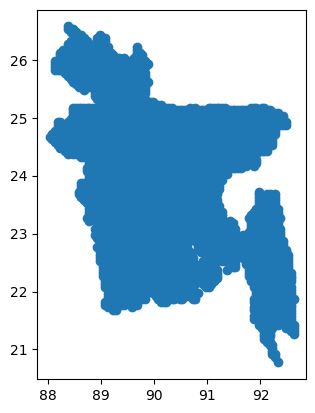

In [35]:
rainfall_2000_shp.reset_index(inplace=True)
rainfall_2000_shp.rename(columns={'precip':'rainfall'},inplace=True)
rainfall_2000_shp = rainfall_2000_shp.to_crs(bd.crs) # make sure crs is same for both geodataframe.
rainfall_2000_shp.plot()

**Now we have the point features of our country where each point represent yearly total rainfall. In order to separate points based on divisions we need to clip these according to the division extent from the bd shapefile.**

In [36]:
divisions = bd.groupby('Division')

In [37]:
clipped_values = []

for key,value in divisions:
    clipped = gpd.clip(rainfall_2000_shp, value).copy()
    clipped['Division']=key
    clipped_values.append(clipped)


In [38]:
merged_values = pd.concat(clipped_values)
merged_values.head()


,index,latitude,longitude,rainfall,geometry,Division
164,1996,21.824997,90.174988,4272.249023,POINT Z (90.17499 21.82500 4272.24902),Barisal
163,1995,21.824997,90.125000,4278.103027,POINT Z (90.12500 21.82500 4278.10303),Barisal
190,2087,21.875000,90.075012,4241.373047,POINT Z (90.07501 21.87500 4241.37305),Barisal
192,2089,21.875000,90.174988,4281.305664,POINT Z (90.17499 21.87500 4281.30566),Barisal
191,2088,21.875000,90.125000,4285.476074,POINT Z (90.12500 21.87500 4285.47607),Barisal


In [40]:
merged_values.drop(columns=['index','latitude','longitude'],inplace=True)
merged_values.head()

,rainfall,geometry,Division
164,4272.249023,POINT Z (90.17499 21.82500 4272.24902),Barisal
163,4278.103027,POINT Z (90.12500 21.82500 4278.10303),Barisal
190,4241.373047,POINT Z (90.07501 21.87500 4241.37305),Barisal
192,4281.305664,POINT Z (90.17499 21.87500 4281.30566),Barisal
191,4285.476074,POINT Z (90.12500 21.87500 4285.47607),Barisal


**Now we can separate points according to division extent.**

<Axes: >

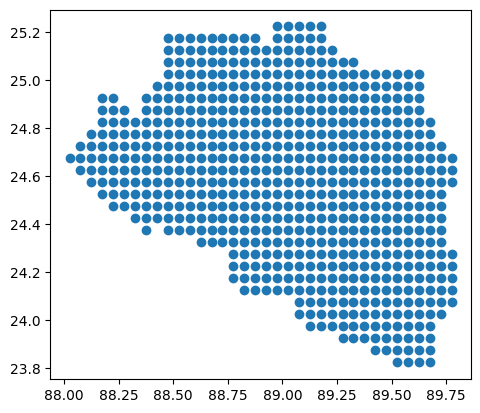

In [42]:
rajshahi = merged_values[merged_values['Division']=='Rajshahi']
rajshahi.plot()

**As each point represent yearly total rainfall value, we can just take the average for each division to get a single yearly average rainfall value for that division.**

In [43]:
rainfall_group = merged_values.groupby('Division')
avg_rainfall= [] 
area = []
for key,value in rainfall_group:
    area.append(key)
    avg_rainfall.append(value['rainfall'].mean())



In [44]:
rainfall_division = pd.DataFrame({'Division':area,'Rainfall':avg_rainfall})
rainfall_division

,Division,Rainfall
0,Barisal,2575.120361
1,Chittagong,2908.577148
2,Dhaka,2210.655762
3,Khulna,1679.186768
4,Mymensingh,3147.656250
5,Rajshahi,1765.917969
6,Rangpur,2789.612061
7,Sylhet,4210.766602


Text(0.5, 1.0, 'Total Rainfall in year 2000.')

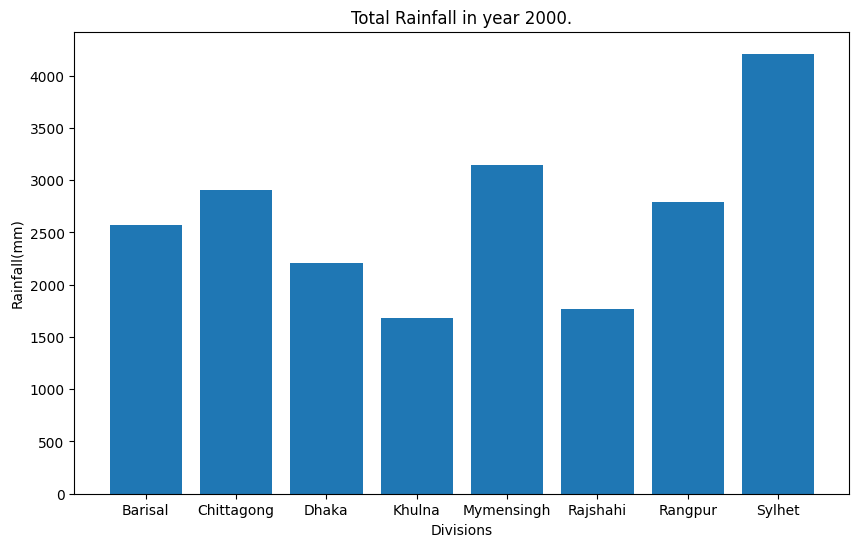

In [60]:
plt.figure(figsize=(10,6))
plt.bar(rainfall_division['Division'],rainfall_division['Rainfall'])
plt.xlabel('Divisions')
plt.ylabel('Rainfall(mm)')
plt.title('Total Rainfall in year 2000.')

**Lets see Yearly variations from 2000 to 2022 for the whole country.**

In [62]:
bd_rainfall = bd_rainfall.drop('spatial_ref')
bd_rainfall

<xarray.Dataset>
Dimensions:    (time: 277, latitude: 117, longitude: 93)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2023-01-01
  * latitude   (latitude) float32 20.77 20.82 20.88 20.92 ... 26.47 26.52 26.57
  * longitude  (longitude) float32 88.02 88.08 88.12 88.17 ... 92.52 92.58 92.62
Data variables:
    precip     (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes: (12/31)
    acknowledgements:          The Climate Hazards Group InfraRed Precipitati...
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             pete@geog.ucsb.edu
    creator_name:              Pete Peterson
    creator_type:              person
    ...                        ...
    summary:                   This dataset has monthly averages of the Clima...
    time_coverage_end:         2023-01-01T00:00:00Z
    time_coverage_start:       2000-01-01T00:00:00Z
    title:                     CHIRPS Version 2.0, Precipitation, Global, 0.0...
    version:                   2.0
    Westernmost_Easting:       88.024994

**Using for loop to iterate over all the years and calculating average rainfall from the total_precip and saving the year and the corresponding mean value to a list. And later created a new dataframe named 'rainfall_variation'**

In [68]:
yearly_rainfall= [] 
year = []

for i in list(np.arange(2000,2023,1)):
    year.append(i)
    yr = bd_rainfall.sel(time=data['time'].dt.year == i)
    precipitation = yr['precip']
    total_precip = precipitation.sum(dim='time')
    total_precip = total_precip.where(total_precip != 0, np.nan)
    yearly_rainfall.append(total_precip.mean().values)


rainfall_variation = pd.DataFrame({'Year':year,'Rainfall':yearly_rainfall})
rainfall_variation

,Year,Rainfall
0,2000,2572.2708
1,2001,2386.2568
2,2002,2497.0479
3,2003,2288.5317
4,2004,2716.3496
5,2005,2244.0664
6,2006,2008.9778
7,2007,2727.6582
8,2008,2191.2415
9,2009,2287.0361


**Creating lineplot using the data**

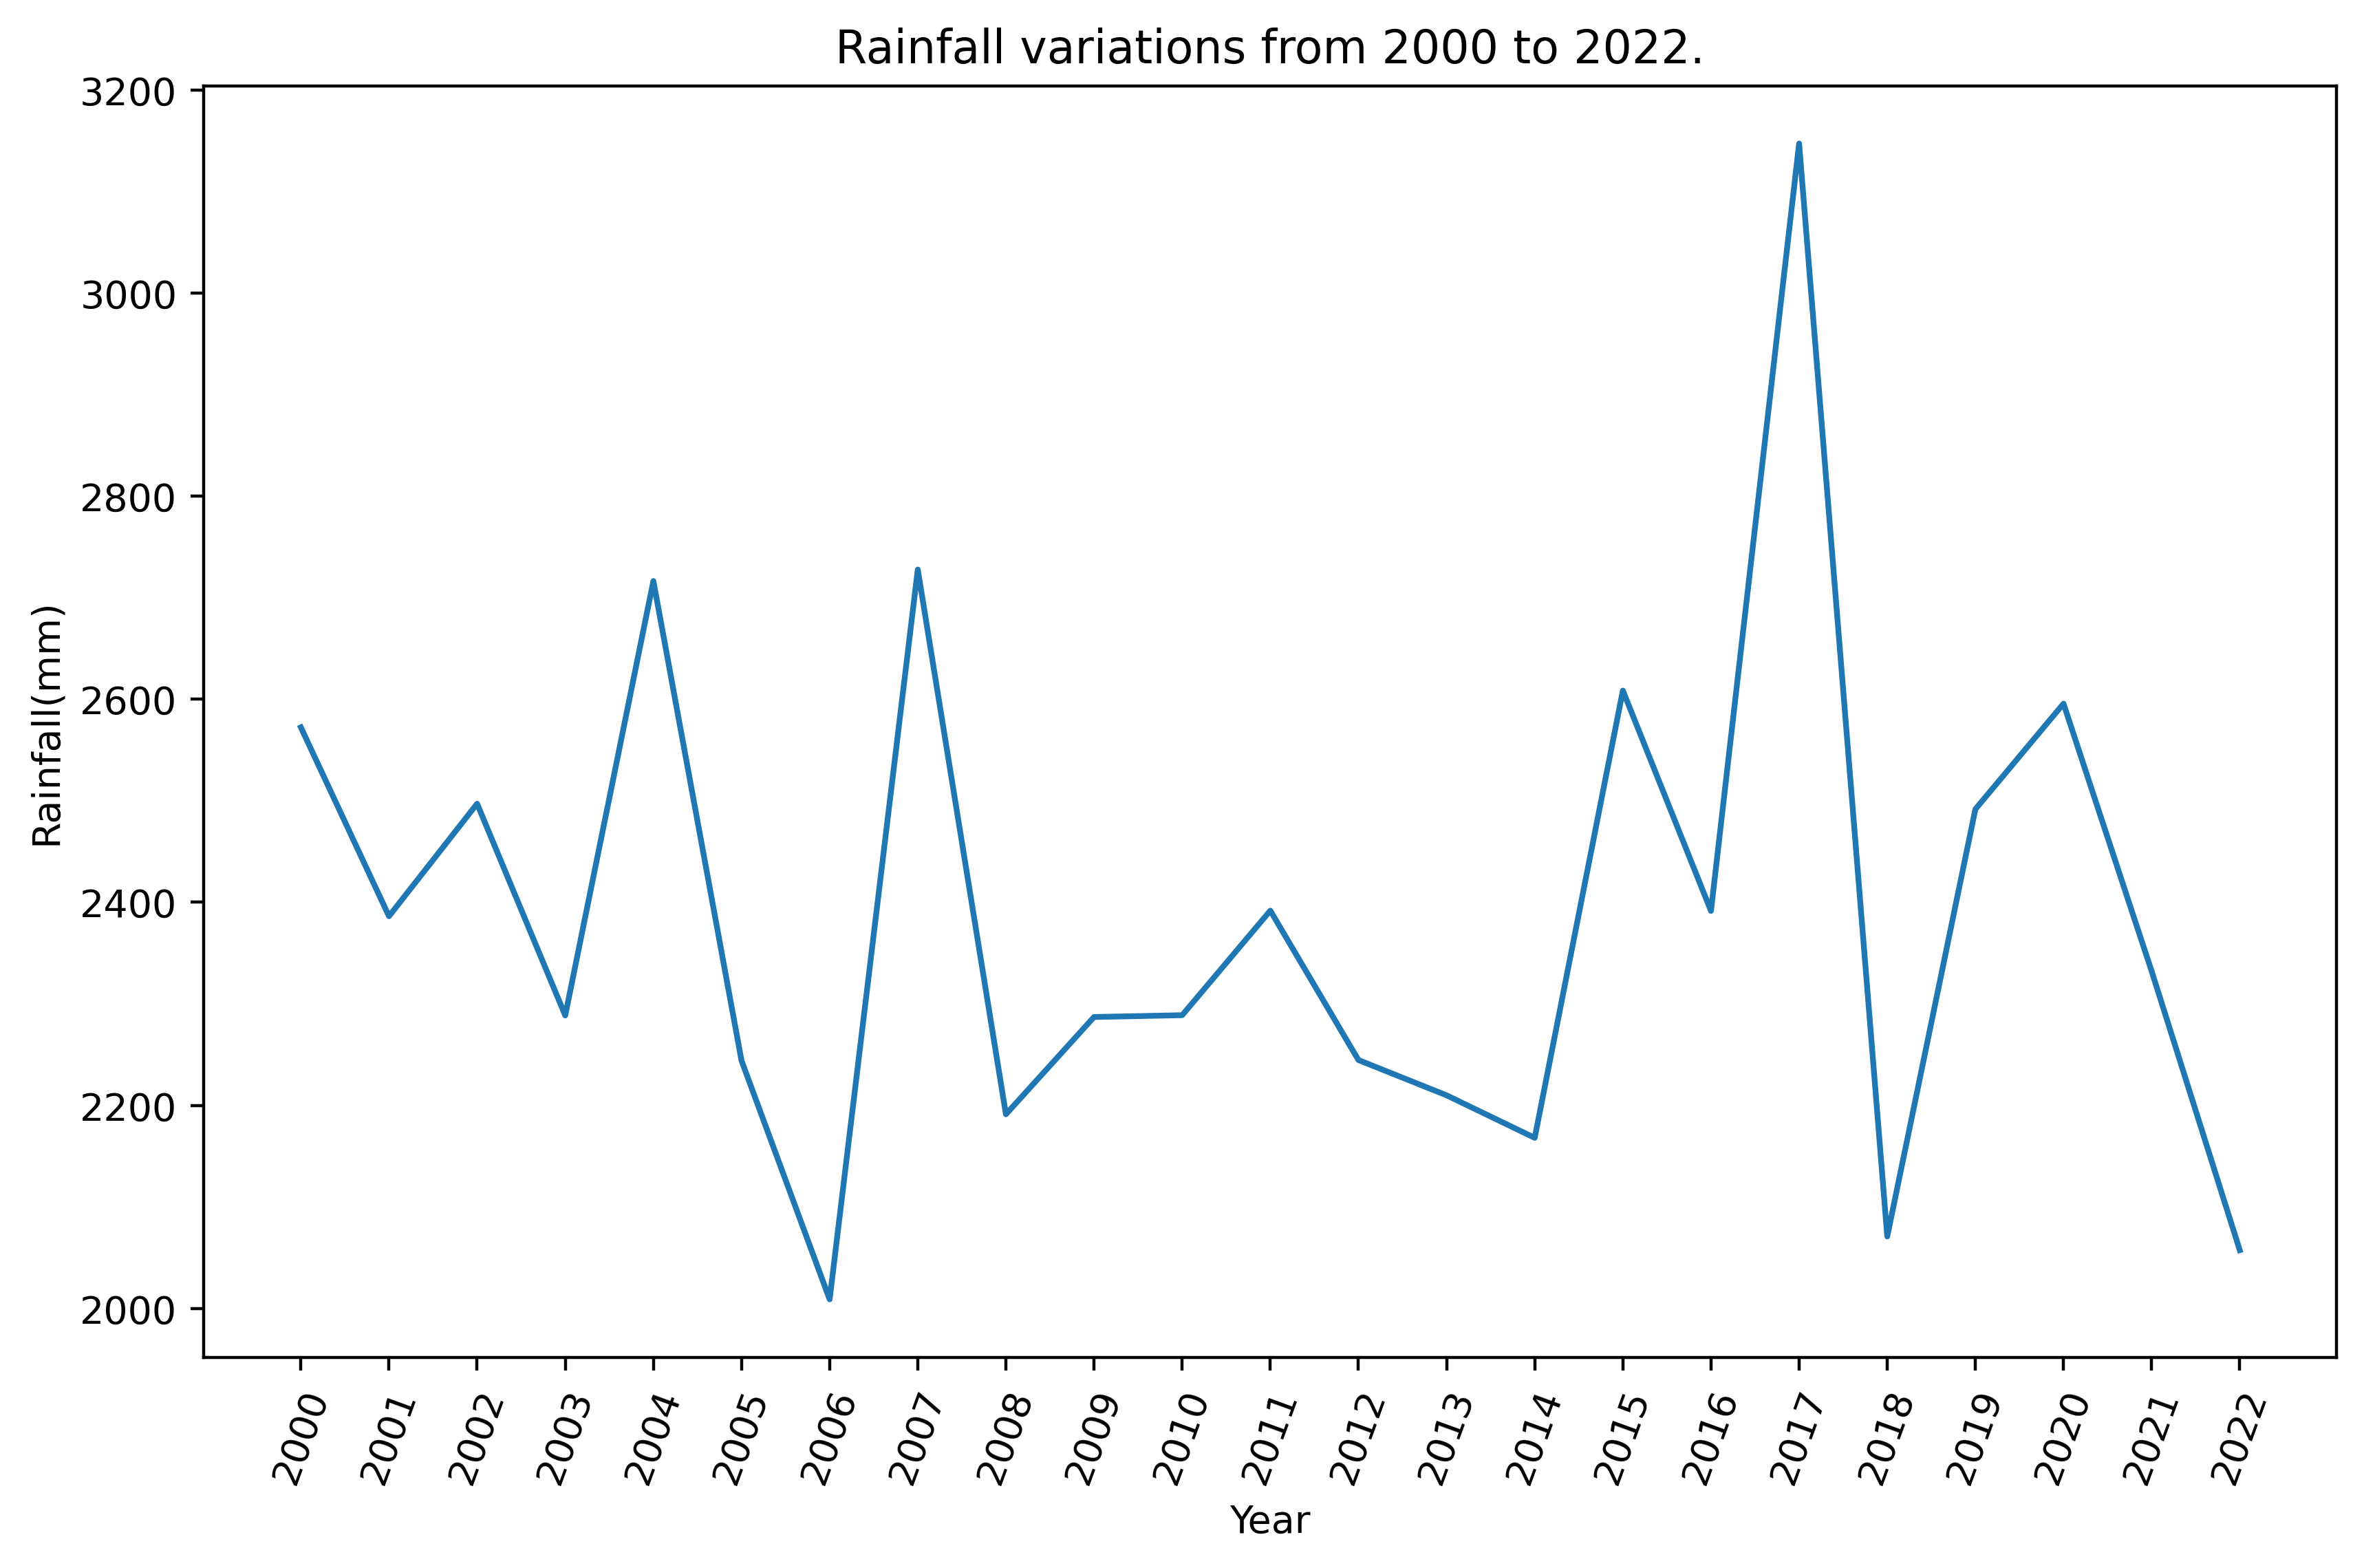

In [74]:
plt.figure(figsize=(10,6),dpi=400)
plt.plot(rainfall_variation['Year'],rainfall_variation['Rainfall'])
plt.xticks(np.arange(2000,2023,1),rotation=70)
plt.xlabel('Year')
plt.ylabel('Rainfall(mm)')
plt.title('Rainfall variations from 2000 to 2022.')
plt.show()

**It's time to add up all that you learned till now. Following code is just the process of calculating yearly mean Rainfall value for each divisions just like before, we did for year 2000. Now we're just doing the same thing directly for all the year from 2000 to 2022.**

In [75]:
years = []
div_rainfall= [] 
division_list = []
for i in list(np.arange(2000,2023,1)):
    yr = bd_rainfall.sel(time=data['time'].dt.year == i)
    precipitation = yr['precip']
    lon = yr['longitude']
    lat = yr['latitude']
    total_precip = precipitation.sum(dim='time')
    total_precip = total_precip.where(total_precip != 0, np.nan)
    
    rainfall = total_precip.to_dataframe()
    rainfall = rainfall.reset_index()
    rainfall.dropna(inplace=True)

    def create_point(row):
        return Point(row['longitude'],row['latitude'],row['precip'])

    rainfall['geometry'] = rainfall.apply(create_point,axis=1)


    rainfall_shp = gpd.GeoDataFrame(rainfall,
                                        geometry=rainfall['geometry'],
                                        crs='EPSG:4326')
    rainfall_shp.reset_index(inplace=True)
    rainfall_shp.rename(columns={'precip':'rainfall'},inplace=True)
    rainfall_shp = rainfall_shp.to_crs(bd.crs) # make sure crs is same for both geodataframe.
    
    
    divisions = bd.groupby('Division')
    clipped_values = []
    for key,value in divisions:
        clipped = gpd.clip(rainfall_shp, value).copy()
        clipped['Division']=key
        clipped_values.append(clipped)
    merged_values = pd.concat(clipped_values)
    merged_values.drop(columns=['index','latitude','longitude'],inplace=True)
    rainfall_group = merged_values.groupby('Division')
    for key,value in rainfall_group:
        years.append(i)
        division_list.append(key)
        div_rainfall.append(value['rainfall'].mean())


**Creating a new dataframe with the values we got by running the above code.**

In [76]:
yearly_div = pd.DataFrame({'Year':years,'Division':division_list,'Rainfall':div_rainfall})
yearly_div

,Year,Division,Rainfall
0,2000,Barisal,2575.120361
1,2000,Chittagong,2908.577148
2,2000,Dhaka,2210.655762
3,2000,Khulna,1679.186768
4,2000,Mymensingh,3147.656250
...,...,...,...
179,2022,Khulna,1349.485107
180,2022,Mymensingh,2298.941895
181,2022,Rajshahi,1436.444336
182,2022,Rangpur,2377.784424


**Creating time-series lineplot for all the divisions in a single graph.**

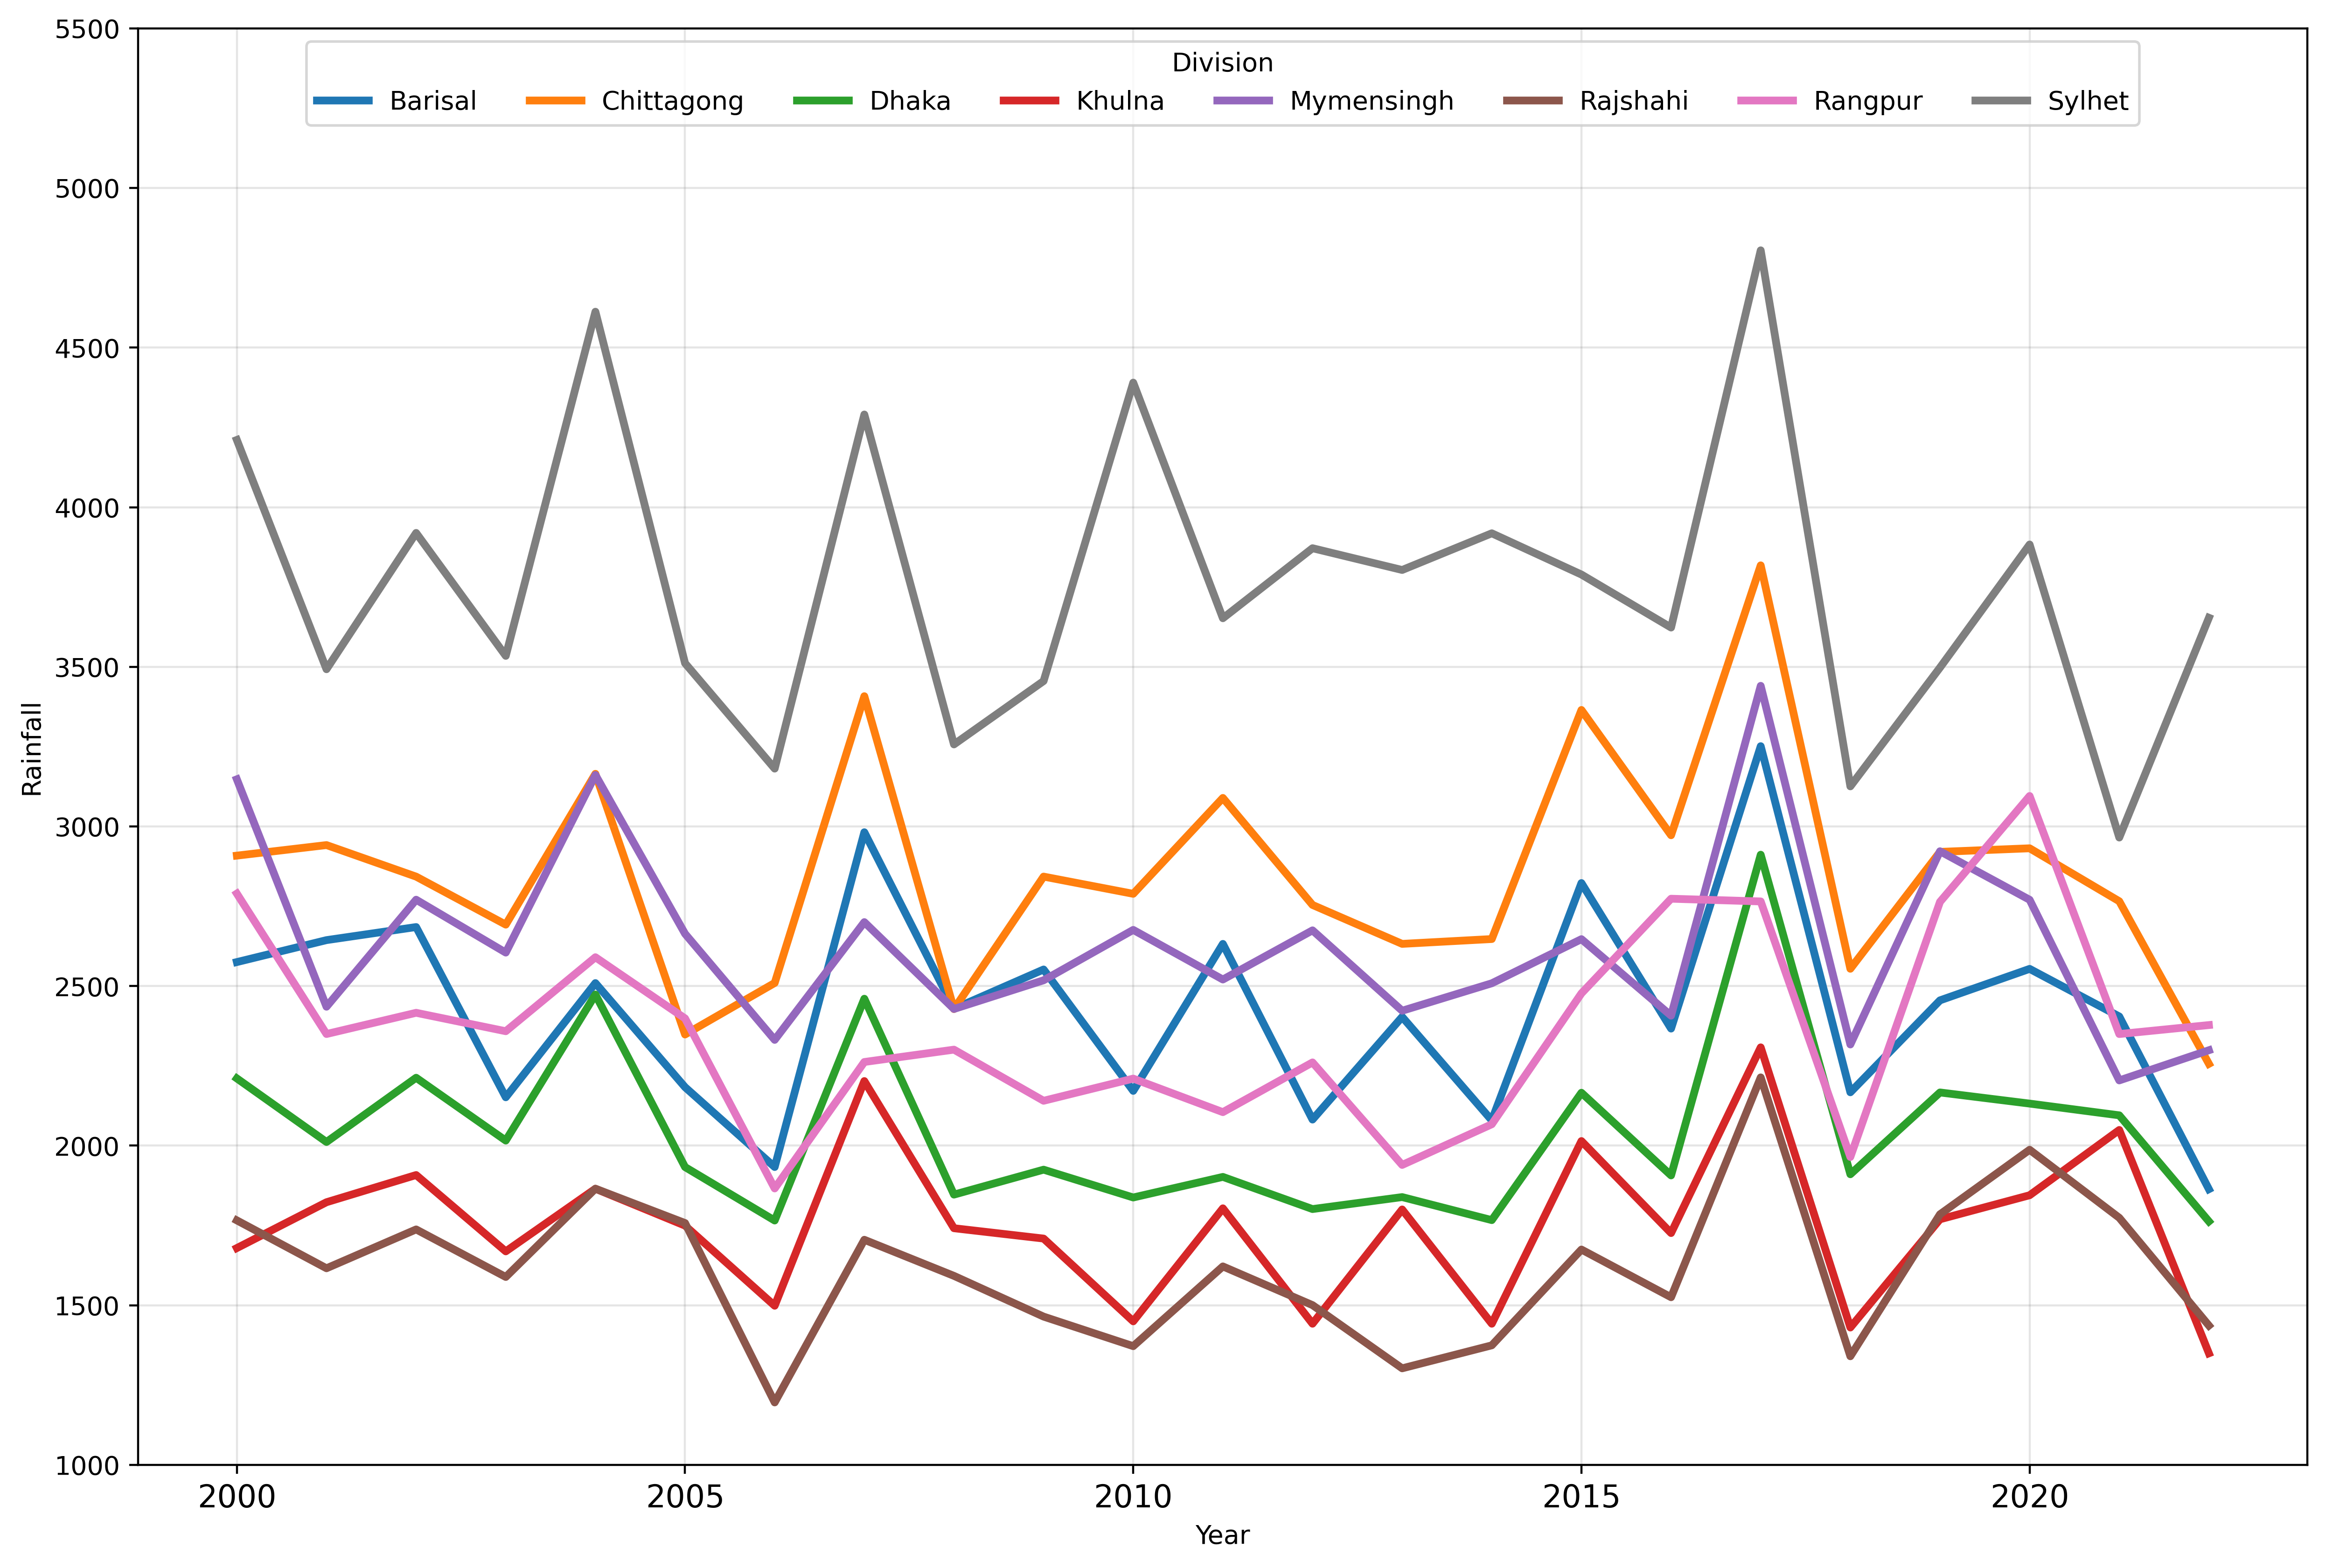

In [98]:
plt.figure(figsize=(15,10),dpi=400)
sns.lineplot(x=yearly_div['Year'],y=yearly_div['Rainfall'],
             hue=yearly_div['Division'],linewidth=3)
legend = plt.legend(loc='upper right', fontsize=18)
legend.set_title("Divisions",prop={'size': 18})
for text in legend.get_texts():
 text.set_text(text.get_text())
plt.legend(ncol=len(yearly_div['Division'].unique()), loc='upper center', bbox_to_anchor=(0.5, 1),title='Division')
plt.xticks( fontsize=12)
plt.yticks(np.arange(1000,6000,500))
plt.grid(True, color='grey',alpha=0.2)
plt.show()

**Creating time-series lineplot for each division one at a time.**

In [77]:
div_group = yearly_div.groupby('Division')

**Remove the "break" from the following cell to plot all the divisions one by one. You can further customize the graph as you wish to look cool.👍🏻👍🏻👍🏻**

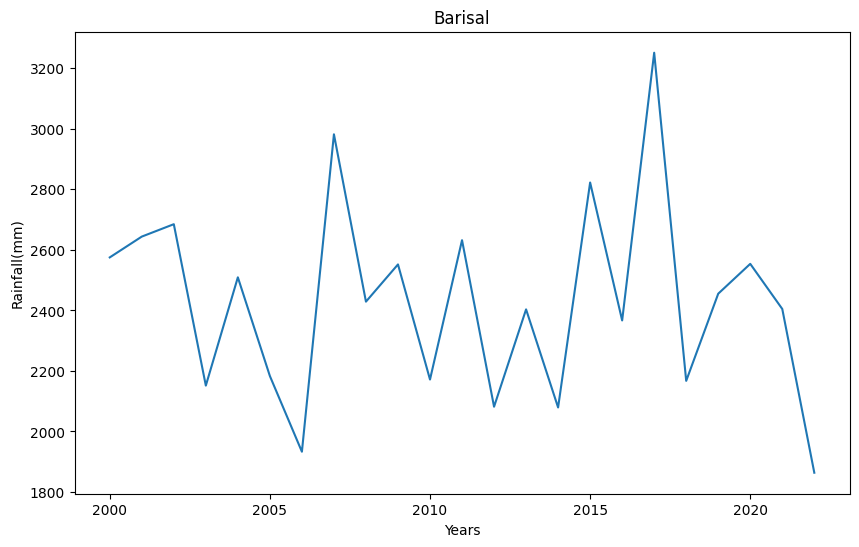

In [79]:
for key, value in div_group:
    plt.figure(figsize=(10,6))
    plt.plot(value['Year'],value['Rainfall'])
    plt.title(key)
    plt.xlabel('Years')
    plt.ylabel('Rainfall(mm)')
    break       # If you want to plot all the divisions one by one, then just remove this line of code.